## Los datos

Para aprender la sintaxis básica de Keras, usaremos un conjunto de datos falso muy simple. Por ahora, centrémonos en la sintaxis de TensorFlow 2.0.

Supongamos que estos datos son medidas de algunas piedras preciosas raras, con 2 características de medida y un precio de venta. Nuestro objetivo final sería tratar de predecir el precio de venta de una nueva piedra preciosa que acabamos de extraer del suelo, para tratar de establecer un precio justo en el mercado.

### Cargar los datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

### Exploración de datos

Echemos un vistazo rápido, deberíamos ver una fuerte correlación entre las características y el "precio" de este producto inventado.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

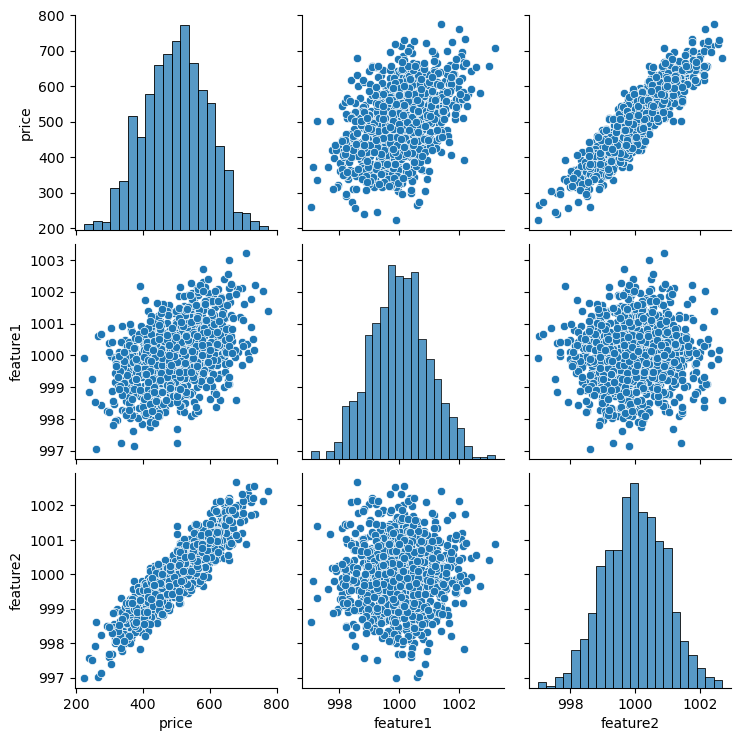

In [4]:
sns.pairplot(df)

### División entrenamiento y prueba

In [5]:
X = df.drop(columns=['price']).values

y = df['price'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Modelo como una lista de capas

In [12]:
model = Sequential([Dense(units=2),
                    Dense(units=2), 
                    Dense(units=2)])

### Modelo agregando capas

In [13]:
model = Sequential()

model.add(Dense(2)) #capa de entrada
model.add(Dense(2)) #capa oculta 1
model.add(Dense(2)) #capa de salida

Avancemos y construyamos un modelo simple y luego compilémoslo definiendo nuestro solucionador

### Elegir un optimizador y función de pérdida

Tenga en cuenta qué tipo de problema está tratando de resolver:

    # Para problema de clasificacion multiclase
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Para problema de clasificacion binario
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Para problema de clasificacion regresion
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [16]:
# red
model = Sequential()

#capa de entrada
model.add(Dense(2, activation='relu'))

#capa oocultas
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

#capa de salida
model.add(Dense(1))

#compilar el modelo 
model.compile(optimizer = 'rmsprop', loss='mse')

# Entrenamiento

A continuación, se incluyen algunas definiciones comunes que es necesario conocer y comprender para utilizar correctamente Keras:

* **Sample:** un elemento de un conjunto de datos.
    
    * Ejemplo: una imagen es una muestra en una red convolucional
    
    * Ejemplo: un archivo de audio es una muestra para un modelo de reconocimiento de voz



* **Batch:** un conjunto de N muestras. Las muestras de un lote se procesan de forma independiente, en paralelo. Si se está entrenando, un lote da como resultado solo una actualización del modelo. Un lote generalmente se aproxima mejor a la distribución de los datos de entrada que una sola entrada. Cuanto mayor sea el lote, mejor será la aproximación; sin embargo, también es cierto que el lote tardará más en procesarse y dará como resultado una sola actualización. Para la inferencia (evaluar/predecir), se recomienda elegir un tamaño de lote que sea tan grande como pueda permitirse sin quedarse sin memoria (ya que los lotes más grandes generalmente darán como resultado una evaluación/predicción más rápida).


* **Epochs:** un corte arbitrario, generalmente definido como "una pasada sobre todo el conjunto de datos", que se usa para separar el entrenamiento en distintas fases, lo cual es útil para el registro y la evaluación periódica.



* Cuando se utiliza **validation_data** o **validation_split** con el método de ajuste de los modelos de Keras, la evaluación se ejecutará al final de cada epoch.



* Dentro de Keras, existe la posibilidad de agregar devoluciones de llamadas (**call_backs**) diseñadas específicamente para ejecutarse al final de una epoch. Ejemplos de estos son cambios en la tasa de aprendizaje y puntos de control del modelo (guardado).

In [17]:
model.fit(X_train, 
          y_train,
          epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 649486.0625
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 558693.5625
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 493992.6875
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 441966.5312
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 399798.1562
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 365878.5312
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 338620.3125
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 316920.9062
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 299809.7500
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 286965.1875
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 277969.6562
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 8773.3564
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 8763.3643
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 8772.8789
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 8755.3389
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 8763.4990
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 8752.3564
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 8758.6260
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 8752.4053
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 8794.0127
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 8753.3516
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 8781.8311
Epoch 108/250
22/22 [==============================] - 0s 2ms/step - loss: 8764.3

22/22 [==============================] - 0s 2ms/step - loss: 8787.0010
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 8758.5586
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 8776.9717
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 8762.9482
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 8771.2598
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 8786.3711
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 8781.9111
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 8773.3574
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 8769.1738
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 8768.8584
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 8756.9824
Epoch 204/250
22/22 [==============================] - 0s 3ms/step - loss: 8782

## Evaluación

Evaluemos nuestro desempeño en nuestro conjunto de entrenamiento y nuestro conjunto de prueba. Podemos comparar estas dos actuaciones para verificar el sobreajuste.

In [22]:
loss = model.history.history['loss']

In [24]:
plt.suptitle('Perdidas de entrenamiento por epoca')

sns.lineplot(x = range(len(loss)), y=loss)

plt.show()

### Compare la evaluación final (MSE) en el conjunto de entrenamiento y el conjunto de prueba.

Con suerte, estos deberían estar bastante cerca uno del otro.

In [25]:
calificacion_entrenamiento = model.evaluate(X_train,y_train, verbose = 0)

calificacion_prueba = model.evaluate(X_test,y_test, verbose = 0)

In [26]:
calificacion_entrenamiento

8731.9501953125

In [27]:
calificacion_prueba

8738.77734375

In [28]:
model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


array([[499.1476 ],
       [499.83316],
       [499.8375 ],
       [499.43683],
       [498.57623],
       [499.6267 ],
       [499.05508],
       [499.4932 ],
       [499.37274],
       [499.4924 ],
       [499.80737],
       [500.04443],
       [499.15683],
       [499.05377],
       [500.38885],
       [499.3747 ],
       [499.84378],
       [499.56302],
       [499.79083],
       [499.83002],
       [498.69336],
       [499.244  ],
       [498.90573],
       [499.08426],
       [499.6227 ],
       [499.55682],
       [499.48004],
       [499.26086],
       [499.66718],
       [499.35138],
       [499.43808],
       [499.40002],
       [499.2853 ],
       [499.81216],
       [499.50232],
       [498.99634],
       [499.9316 ],
       [499.64066],
       [499.12903],
       [498.68912],
       [499.91644],
       [499.31442],
       [499.85544],
       [499.59378],
       [499.4429 ],
       [500.19116],
       [500.3373 ],
       [499.59003],
       [499.07916],
       [499.35632],


# Modelo preprocesamiento

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

X_train_preprocesado = scaler.transform(X_train)
X_test_preprocesado = scaler.transform(X_test)

In [32]:
# red
model = Sequential()

#capa de entrada
model.add(Dense(2, activation='relu'))

#capa oocultas
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

#capa de salida
model.add(Dense(1))

#compilar el modelo 
model.compile(optimizer = 'rmsprop', loss='mse')

In [33]:
model.fit(X_train_preprocesado,
          y_train, 
          validation_data=(X_test_preprocesado, y_test), 
          epochs = 250) 

Epoch 1/250
22/22 [==============================] - 1s 12ms/step - loss: 256718.2188 - val_loss: 259130.8281
Epoch 2/250
22/22 [==============================] - 0s 5ms/step - loss: 256675.7656 - val_loss: 259091.3281
Epoch 3/250
22/22 [==============================] - 0s 5ms/step - loss: 256632.9844 - val_loss: 259043.3125
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 256580.8750 - val_loss: 258985.8125
Epoch 5/250
22/22 [==============================] - 0s 5ms/step - loss: 256519.1719 - val_loss: 258918.0781
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256445.7656 - val_loss: 258836.0781
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 256355.3906 - val_loss: 258734.5312
Epoch 8/250
22/22 [==============================] - 0s 5ms/step - loss: 256244.7812 - val_loss: 258611.8125
Epoch 9/250
22/22 [==============================] - 0s 5ms/step - loss: 256113.0000 - val_loss: 258467.2344
Epoch 10/250
22/22

22/22 [==============================] - 0s 6ms/step - loss: 78934.8828 - val_loss: 76787.9297
Epoch 76/250
22/22 [==============================] - 0s 6ms/step - loss: 73237.9062 - val_loss: 71042.4219
Epoch 77/250
22/22 [==============================] - 0s 5ms/step - loss: 67579.1406 - val_loss: 65357.5352
Epoch 78/250
22/22 [==============================] - 0s 5ms/step - loss: 61967.0273 - val_loss: 59748.1680
Epoch 79/250
22/22 [==============================] - 0s 5ms/step - loss: 56472.1875 - val_loss: 54242.3320
Epoch 80/250
22/22 [==============================] - 0s 5ms/step - loss: 51067.2695 - val_loss: 48853.6602
Epoch 81/250
22/22 [==============================] - 0s 5ms/step - loss: 45788.5703 - val_loss: 43595.1211
Epoch 82/250
22/22 [==============================] - 0s 5ms/step - loss: 40647.1445 - val_loss: 38493.4219
Epoch 83/250
22/22 [==============================] - 0s 5ms/step - loss: 35722.6641 - val_loss: 33620.9805
Epoch 84/250
22/22 [=====================

22/22 [==============================] - 0s 5ms/step - loss: 401.7642 - val_loss: 383.8694
Epoch 153/250
22/22 [==============================] - 0s 5ms/step - loss: 386.8588 - val_loss: 366.2779
Epoch 154/250
22/22 [==============================] - 0s 5ms/step - loss: 371.7401 - val_loss: 351.4282
Epoch 155/250
22/22 [==============================] - 0s 5ms/step - loss: 357.6837 - val_loss: 338.5834
Epoch 156/250
22/22 [==============================] - 0s 4ms/step - loss: 343.0110 - val_loss: 329.3071
Epoch 157/250
22/22 [==============================] - 0s 5ms/step - loss: 330.1548 - val_loss: 313.9933
Epoch 158/250
22/22 [==============================] - 0s 5ms/step - loss: 316.5443 - val_loss: 298.3268
Epoch 159/250
22/22 [==============================] - 0s 5ms/step - loss: 302.0305 - val_loss: 284.4104
Epoch 160/250
22/22 [==============================] - 0s 5ms/step - loss: 287.6482 - val_loss: 270.7373
Epoch 161/250
22/22 [==============================] - 0s 5ms/step - 

22/22 [==============================] - 0s 5ms/step - loss: 24.0935 - val_loss: 26.5009
Epoch 232/250
22/22 [==============================] - 0s 4ms/step - loss: 24.1686 - val_loss: 24.9910
Epoch 233/250
22/22 [==============================] - 0s 5ms/step - loss: 24.6087 - val_loss: 25.0993
Epoch 234/250
22/22 [==============================] - 0s 5ms/step - loss: 24.5533 - val_loss: 25.4523
Epoch 235/250
22/22 [==============================] - 0s 5ms/step - loss: 24.2614 - val_loss: 27.1139
Epoch 236/250
22/22 [==============================] - 0s 5ms/step - loss: 23.8285 - val_loss: 27.7975
Epoch 237/250
22/22 [==============================] - 0s 5ms/step - loss: 24.7846 - val_loss: 26.5937
Epoch 238/250
22/22 [==============================] - 0s 5ms/step - loss: 24.1335 - val_loss: 25.1569
Epoch 239/250
22/22 [==============================] - 0s 5ms/step - loss: 24.2060 - val_loss: 25.3835
Epoch 240/250
22/22 [==============================] - 0s 5ms/step - loss: 24.1373 - va

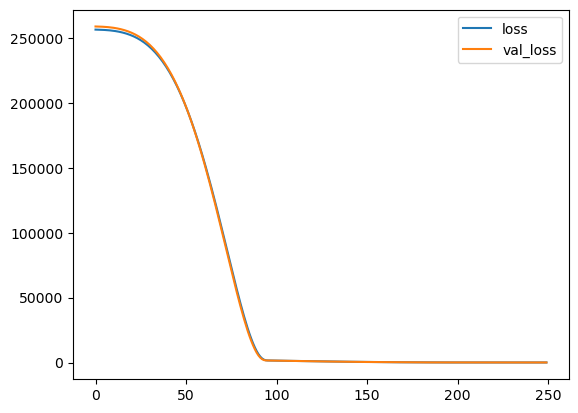

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [36]:
calificacion_entrenamiento = model.evaluate(X_train_preprocesado,y_train, verbose = 0)

calificacion_prueba = model.evaluate(X_test_preprocesado,y_test, verbose = 0)
print(calificacion_entrenamiento)
print(calificacion_prueba)

23.992610931396484
25.868423461914062
